## Init

In [1]:
# %display latex
%matplotlib inline

In [2]:
import sys, os, warnings
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout


@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [3]:
from lbuc import *
from lbuc.bondcalculus import *

In [4]:
import matplotlib

In [5]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'sans',
    'text.usetex': True,
    'pgf.rcfonts': False,
    "axes.labelsize": 8,
    "font.size": 8,
})
textwidth = 6.26894

## Model

In [6]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [7]:
p = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)")

In [8]:
s = p.as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-8m5bg8lf.py"' ...


In [9]:
u = (x, y) = reversed(s.x)

In [10]:
vf = vector(reversed(s.y)); vf

(0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1, -2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0)

In [11]:
def plot_box(B, **kwargs):
    if 'color' not in kwargs:
        kwargs['color'] = 'orange'
    return polygon(
        [(B[0].lower(), B[1].lower()),
         (B[0].lower(), B[1].upper()),
         (B[0].upper(), B[1].upper()),
         (B[0].upper(), B[1].lower())],
        **kwargs,
    )

In [12]:
v2 = [RIF(1,1.2), RIF(4,6)]
v3 = v2 # [RIF(1,1.1), RIF(4,5)]
v4 = [RIF(0.2, 0.4), RIF(7, 8)]
v5 = [RIF(0.4, 1.0), RIF(6, 7)]
v6 = [RIF(0.2, 0.6), RIF(2, 3)]

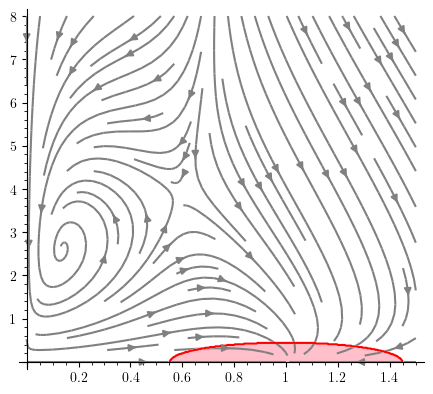

In [13]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')

p.set_aspect_ratio(1/6)
p.show()

## Double start jump

In [14]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 < 0.2)

In [15]:
Qbox = [RIF(0, 0.3), RIF(1.75, 3.5)]

In [16]:
Q = (  Atomic(var("Whelk") < Qbox[0].upper())
     & Atomic(var("Whelk") > Qbox[0].lower())
     & Atomic(var("Lobster") < Qbox[1].upper())
     & Atomic(var("Lobster") > Qbox[1].lower()) )

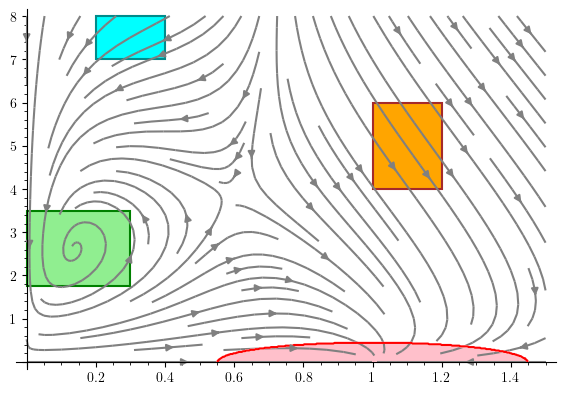

In [17]:
p1 = p
p1 += plot_box(v2, color='orange', edgecolor='brown', thickness=1.5)
p1 += plot_box(Qbox, color='lightgreen', edgecolor='green', thickness=1.5)
p1 += plot_box(v4, color='cyan', edgecolor='darkcyan', thickness=1.5)
p1.set_aspect_ratio(1/8)
p1.save("whelks-phase-portrait.pdf")
p1

## First prop

In [33]:
def plot_reach(s, duration=10, poly=None, color='blue', **kwargs):
    kwargs_ = dict(
        order=5, step=(0.01, 0.5),
        precondition=1,
        estimation=1e-3,
        integrationScheme=2,
        cutoff_threshold=1e-7,
        symbolic_composition=True,
    )
    kwargs_.update(kwargs)
    reach = s.reach(duration, **kwargs_)
    return reach.sage_interval_plot(
        str(s.varmap["Whelk"]), str(s1.varmap["Lobster"]),
        poly=poly)

In [34]:
s1 = m.process("[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-yk0j5zve.py"' ...


In [35]:
s2 = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-_qymcby8.py"' ...


In [36]:
s1.varmap["Whelk"]

x1

In [37]:
kwargs = dict(step=(0.01, 0.1), order=6, estimation=1e-4, cutoff_threshold=1e-15, integration_method=2)

initials = (8.?, 1.?)
var_id_x = 1
var_id_y = 0
initials = (5.?, 1.?)
var_id_x = 1
var_id_y = 0


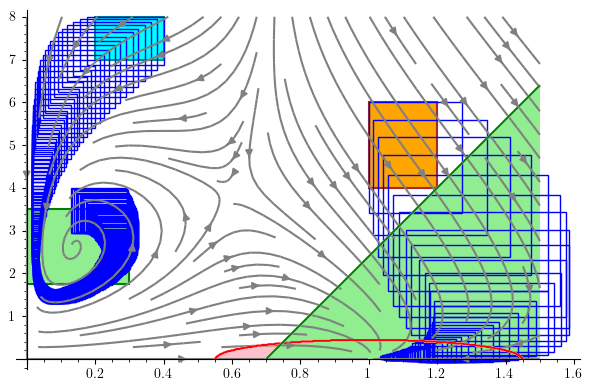

In [38]:
Qplt = p1 + plot_reach(s1, 25, **kwargs)
Qplt += plot_reach(s2, 5, **kwargs)
Qplt += region_plot([SR(x) >= (1/8)*SR(y)+0.7], (x,0,1.5),(y,0,8),

                    incol="lightgreen", bordercol="green")
Qplt.show(aspect_ratio=1/8)

initials = (8.?, 1.?)
var_id_x = 1
var_id_y = 0
initials = (5.?, 1.?)
var_id_x = 1
var_id_y = 0


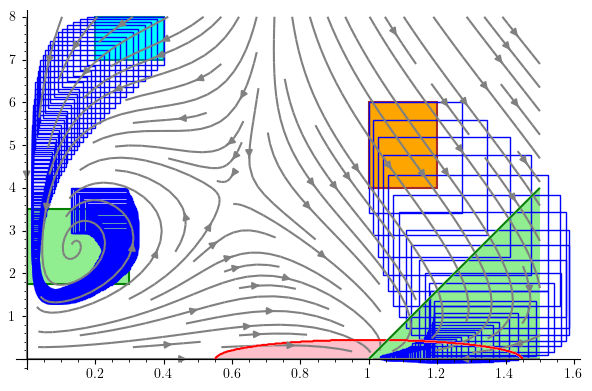

In [39]:
Qplt = p1 + plot_reach(s1, 25, **kwargs)
Qplt += plot_reach(s2, 5, **kwargs)
Qplt += region_plot([SR(x) >= (1/8)*SR(y)+1], (x,0,1.5),(y,0,8),
                     incol="lightgreen", bordercol="green")
Qplt.show(aspect_ratio=1/8)

In [25]:
def S(k):
    return Atomic(var("Whelk") >= (1/8)*var("Lobster") + k)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 113 flowpipes in 1.7247697910061106 sec
PolyObserver(-0.12500000000000000?*x0 + x1 - 1, <flowstar.reachability.Reach object at 0x7f60e8640160>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.49 seconds
roots = [[0.21111846137499992 .. 1.2363636971246542], [1.2759403633580042 .. 1.2759403633580167]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.21111846137499992 .. 1.2363636971246542], 
 [1.2759403633580042 .. 1.2759403

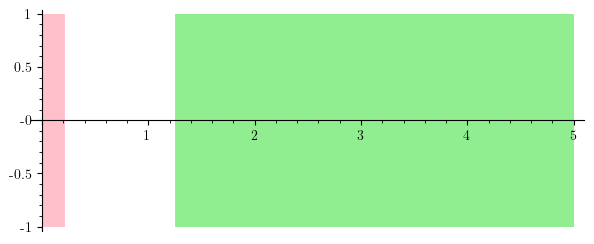

In [26]:
S(1).signal_for_system(s2, 5, **kwargs).plot()

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 113 flowpipes in 1.413184753007954 sec
PolyObserver(-0.12500000000000000?*x0 + x1 - 0.59999999999999998?, <flowstar.reachability.Reach object at 0x7f60e8640160>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.86 seconds
roots = [[0.0000000000000000 .. 0.51475830060296069]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.0000000000000000 .. 0.51475830060296069]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
root

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


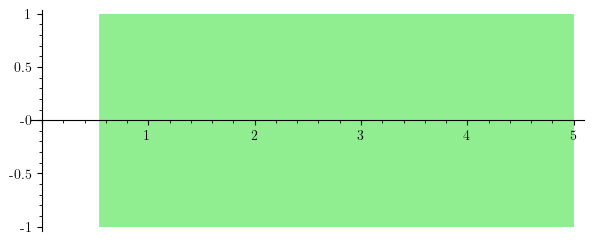

In [27]:
S(0.6).signal_for_system(s2, 5, **kwargs).plot()

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 113 flowpipes in 1.5089543090143707 sec
PolyObserver(-0.12500000000000000?*x0 + x1 - 1.6000000000000001?, <flowstar.reachability.Reach object at 0x7f60e8640a60>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = []
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.00 seconds


/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


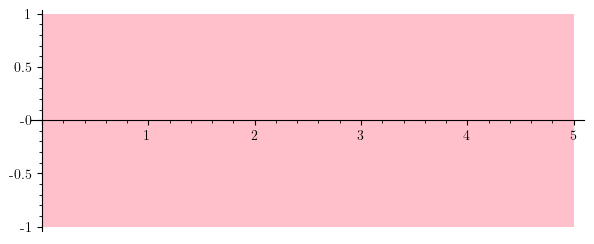

In [28]:
S(1.6).signal_for_system(s2, 5, **kwargs).plot()

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


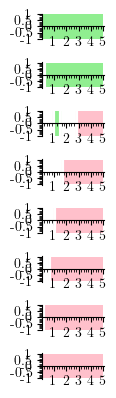

In [29]:
sigs = []
for k in srange(0.9, 1.6, 0.1, include_endpoint=True):
    with suppress_stdout():
        sigs.append(G(1, S(k)).signal_for_system(s2, 5, **kwargs))
graphics_array([[sig.plot()] for sig in sigs])

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


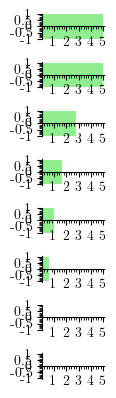

In [30]:
sigs = []
for k in srange(0.9, 1.6, 0.1, include_endpoint=True):
    with suppress_stdout():
        sigs.append(G(1, S(k)).signal_for_system(s2, 5, **kwargs).to_mask_and())
graphics_array([[sig.plot()] for sig in sigs])

In [31]:
S(0.4).signal_for_system(s2, 5, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 113 flowpipes in 1.3405921230150852 sec
PolyObserver(-0.12500000000000000?*x0 + x1 - 0.40000000000000003?, <flowstar.reachability.Reach object at 0x7f60e9963a60>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.30 seconds
roots = [[0.0000000000000000 .. 0.22585563444375026]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.0000000000000000 .. 0.22585563444375026]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roo

Signal([0.0000000000000000 .. 5.0000000000000000], [([0.22585563444375025 .. 5.0000000000000000], True)], mask=None)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 113 flowpipes in 1.5331486170180142 sec
PolyObserver(-0.12500000000000000?*x0 + x1 - 3, <flowstar.reachability.Reach object at 0x7f60e8640160>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = []
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.00 seconds


/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


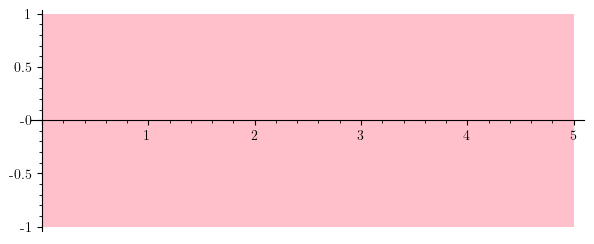

In [32]:
S(3).signal_for_system(s2, 5, **kwargs).plot()

## Performance experiments

In [40]:
from time import perf_counter

In [41]:
def monitoring_result(system, prop, duration=0, **kwargs):
    print(f"monitoring {prop} with use_masks = {kwargs.get('use_masks', False)} ...")
    t0 = perf_counter()
    sig = prop.signal_for_system(system, duration, **kwargs)
    t1 = perf_counter()
    print(f"done in {t1 - t0} sec")
    return sig, t1 - t0

In [42]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt

### Iterated Masking

In [36]:
props = [
    "[0.05, 0.1] Whelk" >> G(RIF(0,0.2), ~P),
    G(RIF(10.2, 10.3), ("[0.05,0.1] Whelk" >> F(RIF(0,0.2), ~P))),
    F(RIF(5, 5.1),
         "[1, 1.5] Lobster" >>
         G(RIF(10.2, 10.3),
           "[0.05, 0.1] Whelk" >>
            F(RIF(0,0.2), ~P))),
    G(RIF(2, 2.5),
         "[0.1, 0.2] Whelk" >>
         F(RIF(5, 5.1),
           "[1, 1.5] Lobster" >>
           G(RIF(10.2, 10.3),
             "[0.05, 0.1] Whelk" >>
             F(RIF(0,0.2), ~P))))
]

In [43]:
props = [
    F(RIF(0, 5), P),
    G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P)),
#    "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), P),
    G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P))),
#    "[1, 1.5] Lobster" >> F(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), P)),
    G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P)))),
#    "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> F(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), P))),
    G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P))))),
    G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P)))))),
#    G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), P)))))),
]

In [44]:
props

[F([0 .. 5], Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)),
 G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, F([0 .. 5], Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)))),
 G([5.0000000000000000 .. 5.1000000000000006], C([0.5, 0.6] Whelk, G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, F([0 .. 5], Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)))))),
 G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, G([5.0000000000000000 .. 5.1000000000000006], C([0.5, 0.6] Whelk, G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, F([0 .. 5], Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)))))))),
 G([5.0000000000000000 .. 5.1000000000000006], C([0.5, 0.6] Whelk, G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, G([5.0000000000000000 .. 5.1000000000000006], C([0.5, 0.6] Whelk, G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, F([0 .. 5], Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)))))))))),
 G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, G([5.0000000000000000 .. 5.1000000000000006], C([0.5, 0.6] Whelk, G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, G([5.0000000000000000 .. 5.1000000000000006], C([0.5, 0.6] Whelk, G([5.0000000000000000 .. 5.1000000000000006], C([1, 1.5] Lobster, F([0 .. 5], Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))))))))))))]

In [45]:
res = monitoring_result(s2, props[2], 2, use_masks=True, **kwargs)

monitoring G([5.0000000000000000 .. 5.1000000000000006], [0.5, 0.6] Whelk >> G([5.0000000000000000 .. 5.1000000000000006], [1, 1.5] Lobster >> F([0 .. 5], Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))) with use_masks = True ...
Running cmd: 'savesage "([-1 .. 1] Lobster || [-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0.5, 0.6] Whelk)" "/tmp/bond-sage-script-9ofdpq9y.py"' ...
Running cmd: 'savesage "[0.5, 0.6] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 

In [46]:
res

(Signal([0.0000000000000000 .. 2.0000000000000000], [([0.0000000000000000 .. 2.0000000000000000], True)], mask=Mask([0.0000000000000000 .. 2.0000000000000000], [[0.0000000000000000 .. 2.0000000000000000]])),
 6.438239837007131)

In [47]:
monitoring_result(s2, props[2], use_masks=False, **kwargs)

monitoring G([5.0000000000000000 .. 5.1000000000000006], [0.5, 0.6] Whelk >> G([5.0000000000000000 .. 5.1000000000000006], [1, 1.5] Lobster >> F([0 .. 5], Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))) with use_masks = False ...
Running cmd: 'savesage "([-1 .. 1] Lobster || [-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0.5, 0.6] Whelk)" "/tmp/bond-sage-script-55qsd5ck.py"' ...
Running cmd: 'savesage "[0.5, 0.6] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998

y0=[[-0.073317832810327028 .. 1.4668260876592197], [1.1785641915573707 .. 1.5062116783842164]]
y0_ctx=[None, [0.49999999999999988 .. 0.60000000000000020]]
phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[-0.073317832810327028 .. 1.4668260876592197], [1.1785641915573707 .. 1.5062116783842164]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.240000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})), y0_ctx=[None, [0.49999999999999988 .. 0.60000000000000020]]))
initials = [(None, 0.?e1), (1.?, 2.?)]
y0=[[-0.018346986689703093 .. 1.4668260876592197], [1.1815908640252013 .. 1.5062116783842164]]
y0_ctx=[None, [0.49999999999999988 .. 0.60000000000000020]]
phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[-0.018346986689703093 .. 1.46

limit_output extension: Maximum message size of 10000 exceeded with 10410 characters

In [ ]:
ress_unmasked

In [ ]:
ress_unmasked = [
    monitoring_result(s2, prop, 1, use_masks=False, **kwargs)
    for prop in props
]
ress_masked = [
    monitoring_result(s2, prop, 1, use_masks=True, **kwargs)
    for prop in props
]

In [ ]:
table([[t, s(0)] for s, t in ress_unmasked])

In [ ]:
table([[t, s(0)] for s, t in ress_masked])

In [ ]:
ress = pd.DataFrame(
    [[i, t1, t2] for i, ((_, t1), (_, t2)) in enumerate(zip(ress_unmasked, ress_masked), 0)],
    columns = ['Depth', 'Unmasked Time', 'Masked Time']
)

In [ ]:
ress

In [ ]:
ress.to_csv('alternation-depth-monitoring-times.csv', sep="\t", index=False)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(0.45*textwidth, 0.4*textwidth)
ress.plot.line('Depth', ['Unmasked Time', 'Masked Time'], ax=ax)
plt.ylabel("Monitoring Time (sec)")
plt.savefig("alternation-depth-monitoring-times.pgf", bbox_inches='tight')

In [ ]:
ress.plot('Depth', ['Unmasked Time', 'Masked Time'], 'line', logy=True)

### Eventually window monitoring time impact

In [59]:
def alter_prop(k):
    return F(RIF(10 - k, 10), "[0.05, 0.1] Whelk" >> G(RIF(0,1), ~P))

In [60]:
srange(0, 10, 1, include_endpoint=True)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [61]:
res_alter = [
    (i, k, monitoring_result(s2, alter_prop(k),
                      use_masks=masking, **kwargs), masking)
    for i in range(0, 5)
    for masking in [False, True]
    for k in srange(0, 10, 0.5, include_endpoint=True)
]

monitoring F(10, [0.05, 0.1] Whelk >> G([0 .. 1], ~(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))) with use_masks = False ...
Running cmd: 'savesage "([-1 .. 1] Lobster || [-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0.05, 0.1] Whelk)" "/tmp/bond-sage-script-h_0qi9rs.py"' ...
Running cmd: 'savesage "[0.05, 0.1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-nupwal37.py"' ...
moving [0.0000000000000000 .. -0.0000000000000

Computed 41 flowpipes in 0.45953142299549654 sec
In G.signal
mask for G = None
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f60e8640a60>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.99 seconds
roots = [[0.0000000000000000 .. 1.0059999999990000]]
domain = [0.0000000000000000 .. 1.0060000000000001]
roots = [[0.0000000000000000 .. 1.0059999999990000]]
seg_domain = [0.0000000000000000 .. 1.0060000000000001]
roots = [[0.0000000000000000 .. 1.0059999999990000]]
signal given bool roots: 1 items in 0.00 seconds
y0=[[-0.066974794929165027 .. 1.4746898389721977], [1.1810735045161602 .. 1.5062116783842164]]
y0_ctx=[None, [0.049999999999999995 .. 0.10000000000000001]]
phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[-0.066974794929165027 .. 1.4746898389721977], [1.1810

limit_output extension: Maximum message size of 10000 exceeded with 10156 characters

In [64]:
repr(res_alter[0])

'(0, 0.000000000000000, (Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), 14.577059900999302), False)'

In [65]:
res_alter1 = {(i, k, m): t for (i, k, (_, t), m) in res_alter}

In [66]:
alter_df = pd.DataFrame(
    [[k, i, res_alter1[(i, k, False)], res_alter1[(i, k, True)]]
     for i in srange(0, 5)
     for k in srange(0, 10, 0.5, include_endpoint=True)],
    columns = ['k', 'i', 'Unmasked Time', 'Masked Time']
); alter_df

,k,i,Unmasked Time,Masked Time
0,0.000000000000000,0,14.577060,2.465691
1,0.500000000000000,0,18.193937,2.888835
2,1.00000000000000,0,17.218588,3.094792
3,1.50000000000000,0,15.600816,3.433704
4,2.00000000000000,0,14.777366,3.636404
...,...,...,...,...
100,8.00000000000000,4,19.703885,9.804704
101,8.50000000000000,4,15.995984,15.034894
102,9.00000000000000,4,15.666032,18.123920
103,9.50000000000000,4,16.043328,15.437984


In [68]:
alter_df.groupby("k").std()

,Unmasked Time,Masked Time
k,,
0.000000000000000,0.817112,0.157049
0.500000000000000,1.182862,0.165494
1.00000000000000,1.159161,0.223303
1.50000000000000,1.232488,0.327507
2.00000000000000,0.788836,0.335293
2.50000000000000,0.749562,0.112892
3.00000000000000,0.791616,0.077926
3.50000000000000,0.133507,0.162566
4.00000000000000,0.218894,0.224023


In [67]:
alter_df_grouped = alter_df.groupby("k").mean(); alter_df_grouped

,Unmasked Time,Masked Time
k,,
0.000000000000000,15.485882,2.460336
0.500000000000000,16.111369,2.623203
1.00000000000000,16.477253,2.713103
1.50000000000000,16.066612,2.894632
2.00000000000000,15.683306,3.053663
2.50000000000000,15.789797,3.099413
3.00000000000000,15.759551,3.220525
3.50000000000000,15.565964,3.446080
4.00000000000000,15.472787,3.614050


In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(0.45*textwidth, 0.45*textwidth)
alter_df_grouped.plot(ylim=(0,18), ax=ax, legend=False)
#alter_df_grouped.plot(y='Unmasked Time', ylim=(0,18),ax=ax)
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(
       FuncFormatter(lambda num, pos: "%.1f" % (num // 2))
)
plt.ylabel("$k$")
plt.ylabel("Monitoring Time (sec)")
plt.savefig('masked-unmasked-monitoring.pdf', bbox_inches='tight')
plt.savefig('masked-unmasked-monitoring.pgf', bbox_inches='tight')
show(fig)

<Figure size 203.114x203.114 with 1 Axes>

### or-masking window impact

In [44]:
prop = F(RIF(0, 1), "[0.05, 0.1] Whelk" >> G(RIF(0,10), ~P))

In [45]:
ress2_raw = [
    (i, k, monitoring_result(s2, G(1, S(k)) & prop, 5, use_masks=masking, **kwargs), masking)
    for i in range(0, 5)
    for masking in [False, True]
    for k in srange(0.9, 1.6, 0.1, include_endpoint=True)
]

monitoring G(1, Whelk >= 1/8*Lobster + 0.900000000000000) & F([0 .. 1], [0.05, 0.1] Whelk >> G([0 .. 10], ~(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))) with use_masks = False ...
Running cmd: 'savesage "([-1 .. 1] Lobster || [-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0.05, 0.1] Whelk)" "/tmp/bond-sage-script-v68cerr6.py"' ...
Running cmd: 'savesage "[0.05, 0.1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-n1smw5lt

Computed 141 flowpipes in 1.5378424470109167 sec
In G.signal
mask for G = None
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f60d2302b80>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.69 seconds
roots = [[0.0000000000000000 .. 2.3090271179156115], [2.4073231017551548 .. 2.4073231017551718]]
domain = [0.0000000000000000 .. 10.006000000000003]
roots = [[0.0000000000000000 .. 2.3090271179156115], 
 [2.4073231017551548 .. 2.4073231017551718]]
seg_domain = [0.0000000000000000 .. 10.006000000000003]
roots = [[0.0000000000000000 .. 2.3090271179156115], 
 [2.4073231017551548 .. 2.4073231017551718]]
signal given bool roots: 1 items in 0.00 seconds
y0=[[-0.081526428912026828 .. 1.0853562506643189], [1.1077231457603111 .. 1.4352108440562963]]
y0_ctx=[None, [0.049999999999999995 .. 0.1

limit_output extension: Maximum message size of 10000 exceeded with 10277 characters

In [52]:
ress2_dict = {(i, k, m): t for (i, k, (_, t), m) in ress2_raw}

In [53]:
ress2_df = pd.DataFrame(
    [[k, i, ress2_dict[(i, k, False)], ress2_dict[(i, k, True)]]
     for i in srange(0, 5)
     for k in srange(0.9, 1.6, 0.1, include_endpoint=True)],
    columns = ['k', 'i', 'Unmasked Time (sec)', 'Masked Time (sec)']
); ress2_df

,k,i,Unmasked Time (sec),Masked Time (sec)
0,0.900000000000000,0,12.251061,11.965647
1,1.00000000000000,0,12.998305,12.035830
2,1.10000000000000,0,11.911084,10.057139
3,1.20000000000000,0,12.025134,10.335637
4,1.30000000000000,0,11.994273,7.658551
5,1.40000000000000,0,11.959583,6.652339
6,1.50000000000000,0,11.914709,3.633630
7,1.60000000000000,0,11.913962,1.684002
8,0.900000000000000,1,11.965251,12.235373
9,1.00000000000000,1,12.272459,12.331527


In [54]:
ress2_df.groupby("k").std()

,Unmasked Time (sec),Masked Time (sec)
k,,
0.900000000000000,0.161897,0.281809
1.00000000000000,0.329711,0.414396
1.10000000000000,0.198538,0.299541
1.20000000000000,0.232319,0.206515
1.30000000000000,0.176604,0.334239
1.40000000000000,0.262732,0.109867
1.50000000000000,0.275380,0.071961
1.60000000000000,0.185051,0.043601


In [55]:
ress2_grouped = ress2_df.groupby("k").mean(); ress2_grouped

,Unmasked Time (sec),Masked Time (sec)
k,,
0.900000000000000,12.206776,12.308511
1.00000000000000,12.429404,12.319637
1.10000000000000,12.213830,10.489462
1.20000000000000,12.292738,10.649335
1.30000000000000,12.242421,7.922259
1.40000000000000,12.238492,6.809350
1.50000000000000,12.222073,3.716009
1.60000000000000,12.198535,1.742433


In [56]:
ress2_grouped.plot()

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(0.45*textwidth, 0.45*textwidth)
ress2_grouped.plot(ylim=(0, 13), ax=ax, legend=False)
#alter_df_grouped.plot(y='Unmasked Time', ylim=(0,18),ax=ax)
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(
       FuncFormatter(lambda num, pos: "%.1f" % (0.9 + 0.1*num))
)
plt.xlabel("$m$")
plt.ylabel("Monitoring Time (sec)")
plt.savefig('masked-unmasked-monitoring-and.pdf', bbox_inches='tight')
plt.savefig('masked-unmasked-monitoring-and.pgf', bbox_inches='tight')
show(fig)

<Figure size 203.114x203.114 with 1 Axes>